In [12]:
# <!---
# This program outputs the number of data packets transferred on a monthly basis through all the hotspots in a selected perimeter during the last year
# -->

import pandas as pd
import time
from datetime import date, timedelta
import requests
import json
import numpy as np
from matplotlib import pyplot as plt

dict1 = {}
dict2 = {}


#scen = "norfolkVA"
#lat = "36.848446" 
#lon = "-76.287268"

scen = "miamiFL"
lat = "25.856630"
lon = "-80.278249"

# Seattle, WA: 47.604872,-122.333622
# scen = "seattleWA"
# lat = "47.604872"
# lon = "-122.333622"

#Denver, CO: 39.743418,-104.992285
#scen = "denverCO"
#lat = "39.743418"
#lon = "-104.992285"

#Topeka, KS: 39.033278,-95.681458
#scen = "topekaKS"
#lat = "39.033278"
#lon = "-95.681458"

#Rome, GA: 34.258591,-85.176021
#scen = "romeGA"
#lat = "34.258591"
#lon = "-85.176021"

#Turlock, CA: 37.506028,-120.848877
# scen = "turlockCA"
# lat = "37.506028"
# lon = "-120.848877"


url = "https://api.helium.io/v1/hotspots/location/distance/?lat="+lat+"&lon="+lon+"&distance=32187"
dict1 = json.loads(requests.get(url).text)
dict2 = dict1

while "cursor" in dict1:
    cursor = dict1['cursor']
    url = "https://api.helium.io/v1/hotspots/location/distance/?lat="+lat+"&lon="+lon+"&distance=32187"
    url = url + "&cursor=" + cursor
    dict1 = json.loads(requests.get(url).text)
    dict2.update(dict1)
    time.sleep(1)
url = ''

minTime = []
maxTime = []
current_date = date.today()

hotspot_names = []
for num in range(len(dict2['data'])):
    hotspot_names.append(dict2['data'][num]['name'])
    
for i in range(1,13):
    maxTime.append(current_date)
    priorDate = current_date-timedelta(days=30)
    minTime.append(priorDate)
    current_date = priorDate    


dataPerAddress = {}
for i in range(len(dict2['data'])):
    dataPerAddress[dict2['data'][i]['address']] = []
print(dataPerAddress.keys())
print(len(dataPerAddress))

dict = {}
sum1 = 0
cursor = ''
for a in dataPerAddress:
    print("Current address: ", a)
    for t in range(len(minTime)):            
        url = "https://api.helium.io/v1/hotspots/"+a+"/activity/?filter_types=state_channel_close_v1&min_time="+str(minTime[t])+"T00:00:01Z&max_time="+str(maxTime[t])+"T23:59:59Z"
        dict = json.loads(requests.get(url).text)
        time.sleep(1)
        while "cursor" in dict:
            for i in range(len(dict['data'])):            
                sum1 = sum1 + dict['data'][i]['state_channel']['summaries'][0]['num_packets']
            cursor = dict['cursor']
            url = "https://api.helium.io/v1/hotspots/"+a+"/activity/?filter_types=state_channel_close_v1&min_time="+str(minTime[t])+"T00:00:01Z&max_time="+str(maxTime[t])+"T23:59:59Z"
            url = url + "&cursor=" + cursor
            dict = json.loads(requests.get(url).text)
            time.sleep(1)
        else:
            try:
                for i in range(len(dict['data'])):            
                    sum1 = sum1 + dict['data'][i]['state_channel']['summaries'][0]['num_packets']
            except:
                print("error no data key for ", a)

        dataPerAddress[a].append(sum1)
        sum1 = 0
    dataPerAddress[a].reverse()
    print(dataPerAddress[a])
    
#     plt.plot(dataPerAddress[a])
#     plt.plot(np.cumsum((dataPerAddress)[a]))
#     plt.show()
#     plt.bar(range(9), dataPerAddress[a])
#     plt.show()

# for a in range(0, len(dataPerAddress)):
   
#     plt.plot(list(dataPerAddress.values())[a])
#     if ((a+1) % 3 == 0) or (a == len(dataPerAddress)-1):
#         plt.xlabel("Weeks")
#         plt.ylabel("Rewards [HNT]")
#         plt.title("Data Packets Transferred: ")
#         plt.show()

# for a in range(0, len(dataPerAddress)):
   
#     plt.plot(np.cumsum(list(dataPerAddress.values())[a]))
#     if ((a+1) % 3 == 0) or (a == len(dataPerAddress)-1):
#         plt.xlabel("Weeks")
#         plt.ylabel("Rewards [HNT]")
#         plt.title("Cumulative Data Packets Transferred: ")
#         plt.show()
        
dict.clear()
sum1=0
cursor=''



dict_keys(['1125RqRCt3mJV2eHBsKTbjRWDeLAPdx1dbNfqN99UmCXzGA7sQB7', '112qiMivE2y9L1FVGcVYwLHfqsB1vzZ9grTu4zGvZGqxcK3FctLp', '11HLKqDrtQz8TE8GoQdfnYu4Js47wm4ow4pT7btbSi5SjieJagd', '112Qfbyp3JmqRACWcdSKEewwcmmSCiRtQsGYa7VxqbtqGAiK6ZS8', '112uq6FkmSR3Q1pFGuZyepaTHpscZXViAnzBbZ6LuSXeF5Sg1ftK', '11cSPcKyEx1MPnh2pRDbXPU71cAMx2hLMBm7D8BJ8653tQrnZQZ', '11zN6q6voqpDPKanMbzDLaiLhqL8p75qNPT7irjpzhmAuBFDwzD', '112RGQe2FVj5ntyVbv2AEPXSHDxvsEUJQZzTCwB8iiyEFT22ZKgF', '11FNR3kVTtoXzmb3dBGxcAMLYiM6uSXTpueDVrT46rp4SgtDfE6', '1122fdU8XRgWL8hQjA6mYNd87VG8t6MMBSwmBVZVEWLFvefvdLX', '1185ZhDX8Nr85RGrd99QchwcK3ND6szBc6M12TJ1d34ZL8M5xb8', '112cZFxH4WKGCPk5gimsD6HqxcFcY35mnVA1VJJZ2asAWZSPCX6H', '11bt82sQZAAEDxMknJfvtobP6v4yjSRYEn2fubydzxNPkpLoUj9', '1126f6df7vCa4jcsyFzYLQaU3RWtPqxRfZWQxECr36CawYUkqXUP', '112bsEHqjKadpwmJFWEpSnnqDPrWN5Fp2V4eSBvF5VKmzT2WaVFt', '11z6A1tAk4kg6pADDXQbMQMvMEvN7WWUQ2fhJ234VWuwwbcms59', '112sarLhsGuwvWh7iYf7HaupXubuNkwJji71Wad5cX4axxEFkBzn', '11hVcFhTcCrkuBR8mRBXaAzG97wFKwSw2oNSvEvGTAyP

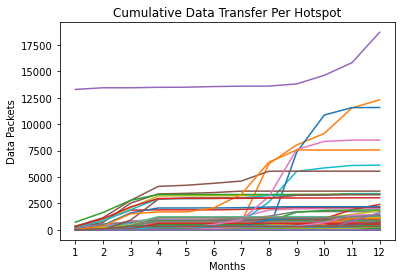

{'1125RqRCt3mJV2eHBsKTbjRWDeLAPdx1dbNfqN99UmCXzGA7sQB7': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '112qiMivE2y9L1FVGcVYwLHfqsB1vzZ9grTu4zGvZGqxcK3FctLp': [0, 0, 390, 254, 0, 0, 72, 5546, 1766, 1092, 2411, 766], '11HLKqDrtQz8TE8GoQdfnYu4Js47wm4ow4pT7btbSi5SjieJagd': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '112Qfbyp3JmqRACWcdSKEewwcmmSCiRtQsGYa7VxqbtqGAiK6ZS8': [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0], '112uq6FkmSR3Q1pFGuZyepaTHpscZXViAnzBbZ6LuSXeF5Sg1ftK': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '11cSPcKyEx1MPnh2pRDbXPU71cAMx2hLMBm7D8BJ8653tQrnZQZ': [0, 0, 0, 0, 0, 0, 0, 25, 0, 0, 0, 0], '11zN6q6voqpDPKanMbzDLaiLhqL8p75qNPT7irjpzhmAuBFDwzD': [0, 0, 11, 9, 0, 0, 0, 0, 0, 0, 1, 0], '112RGQe2FVj5ntyVbv2AEPXSHDxvsEUJQZzTCwB8iiyEFT22ZKgF': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '11FNR3kVTtoXzmb3dBGxcAMLYiM6uSXTpueDVrT46rp4SgtDfE6': [0, 0, 0, 0, 0, 0, 0, 80, 0, 0, 0, 0], '1122fdU8XRgWL8hQjA6mYNd87VG8t6MMBSwmBVZVEWLFvefvdLX': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1185ZhDX8Nr85RGrd99QchwcK3ND6szBc6M12TJ1d

In [14]:
import pickle
import numpy as np

with open(scen+"_dataTransfer_20mile.pkl", 'wb') as fh:
    pickle.dump(dataPerAddress, fh)

file = open("miamiFL_dataTransfer_20mile.pkl", 'rb')
loadedDPA = pickle.load(file)
len(loadedDPA)
from matplotlib import pyplot as plt
for a in range(len(loadedDPA)):    
    plt.plot(np.cumsum(list(loadedDPA.values())[a]))
    #if ((a+1) % 3 == 0) or (a == len(dataPerAddress)-1):

plt.xticks(ticks = list(range(0,12)), labels = list(range(1,13)))
plt.xlabel("Months")
plt.ylabel("Data Packets")
plt.title("Cumulative Data Transfer Per Hotspot")
#plt.legend()
plt.show()
print(loadedDPA)